# Import Library

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMapWithTime
from folium.plugins import HeatMap


#Set max columns to 500
pd.options.display.max_columns = 500

In [2]:
'''
#Original Dataset
path = '/Users/Dustin/Desktop/Lambda/Kaggle Datasets/LA Parking Citations/parking-citations.csv'

#Use data from 2018 only
df_2018 = df[ (df['Issue Date'] >= '2018-01-01') & (df['Issue Date'] <= '2018-12-31') ]

#Create new csv for the 2018 data
df_2018.to_csv('parking-citations-2018.csv')
'''

"\n#Original Dataset\npath = '/Users/Dustin/Desktop/Lambda/Kaggle Datasets/LA Parking Citations/parking-citations.csv'\n\n#Use data from 2018 only\ndf_2018 = df[ (df['Issue Date'] >= '2018-01-01') & (df['Issue Date'] <= '2018-12-31') ]\n\n#Create new csv for the 2018 data\ndf_2018.to_csv('parking-citations-2018.csv')\n"

# Clean Data - Null Values

In [3]:
#Set path to my 2018 dataset
path = '/Users/Dustin/Desktop/Lambda/Kaggle Datasets/LA Parking Citations/parking-citations-2018.csv'

In [4]:
#Check dataframe to see what data we will be using
df=pd.read_csv(path)
print(df.shape)
df.head()

C:\Users\Dustin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(1991542, 20)


,Unnamed: 0,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,4044488,4320468924,2018-01-13T00:00:00,26.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06
1,4044489,4320468935,2018-01-13T00:00:00,27.0,NaN,NaN,CA,201801.0,NaN,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06
2,4044490,4320468946,2018-01-13T00:00:00,27.0,NaN,NaN,CA,201804.0,NaN,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06
3,4044491,4320468950,2018-01-13T00:00:00,28.0,NaN,NaN,CA,201812.0,NaN,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06
4,4044492,4320468961,2018-01-13T00:00:00,29.0,NaN,NaN,CA,201806.0,NaN,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06


In [5]:
#Use the columns we need and save it to a new dataframe
df2 = df[['Issue Date','Issue time','Make','Violation Description', 'Fine amount','Latitude', 'Longitude']]
df2.head()

,Issue Date,Issue time,Make,Violation Description,Fine amount,Latitude,Longitude
0,2018-01-13T00:00:00,26.0,MERZ,NO PARKING,73.0,6.499186e+06,1.866284e+06
1,2018-01-13T00:00:00,27.0,MERZ,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06
2,2018-01-13T00:00:00,27.0,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06
3,2018-01-13T00:00:00,28.0,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06
4,2018-01-13T00:00:00,29.0,TOYT,NO PARKING,73.0,6.499186e+06,1.866284e+06


In [6]:
#Check for Null values, the importants columns are 'Issue time', 'Longitude', 'Latitude'
df2.isnull().sum()

Issue Date                  0
Issue time                532
Make                     1848
Violation Description     266
Fine amount              1667
Latitude                    2
Longitude                   2
dtype: int64

In [7]:
#Need to drop null values from 'Issue Time', 'Longitude', and 'Latitude'
#We only need to drop 'Latitude' since the null values of 'Longitude' were in the same row
df2 = df2.dropna(subset=['Issue time', 'Latitude'])

In [8]:
#Check if nulls are 0 in 'Issue time', 'Longitiude' and 'Latitude'
df2.isnull().sum()

Issue Date                  0
Issue time                  0
Make                     1837
Violation Description     263
Fine amount              1657
Latitude                    0
Longitude                   0
dtype: int64

# Clean Data - String Manipulation

In [9]:
#Remove string 'T00:00:00'
df2['Issue Date'] = df2['Issue Date'].str.strip('T00:00:00')

#Change Issue time from float to int then string for string manipulation
df2['Issue time'] = df2['Issue time'].astype(int).astype(str)

In [10]:
#Check to see the length of each string number. 
df2['Issue time'].str.len().unique()

#Fix the values of length 1 and 2by adding 0s and :
#Example: '4' change to '0:04' and '32' change to '0:32'

array([2, 3, 4, 1], dtype=int64)

In [11]:
#Add string 00 when string contains a length of 1
len_1 = df2[ (df2['Issue time'].str.len() == 1) ]

#len_1 dataframe contains all values of 'Issue time' previously length of 1
len_1['Issue time'] = '00' + len_1['Issue time']

#Check if 00 is added
len_1.head()

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Issue Date,Issue time,Make,Violation Description,Fine amount,Latitude,Longitude
480,2018-01-05,007,VOLK,DISPLAY OF TABS,25.0,6.475105e+06,1.858890e+06
494,2018-01-06,002,TOYT,PREFERENTIAL PARKING,68.0,6.459883e+06,1.860626e+06
515,2018-01-24,003,TOYT,PREFERENTIAL PARKING,68.0,6.448036e+06,1.853301e+06
563,2018-01-11,007,TOYT,WHITE ZONE,58.0,6.470692e+06,1.853059e+06
680,2018-01-05,007,HOND,DISPLAY OF TABS,25.0,9.999900e+04,9.999900e+04


In [12]:
#Add string 0 when string contains a length of 2
len_2 = df2[ (df2['Issue time'].str.len() == 2) ]

#len_2 dataframe contains all values of 'Issue time' previously length of 2
len_2['Issue time'] = '0' + len_2['Issue time']

#Check if 0 is added
len_2.head()

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Issue Date,Issue time,Make,Violation Description,Fine amount,Latitude,Longitude
0,2018-01-13,026,MERZ,NO PARKING,73.0,6.499186e+06,1.866284e+06
1,2018-01-13,027,MERZ,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06
2,2018-01-13,027,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06
3,2018-01-13,028,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06
4,2018-01-13,029,TOYT,NO PARKING,73.0,6.499186e+06,1.866284e+06


In [13]:
#Concat dataframes len_2 and len_1
len_3 = pd.concat([len_2, len_1])

#Test if concatenation is successufl
len_1.shape[0] + len_2.shape[0] == len_3.shape[0]

True

In [14]:
#Update the values of df2 from len_3
df2.update(len_3)

#Check if update is successful
df2.head()

,Issue Date,Issue time,Make,Violation Description,Fine amount,Latitude,Longitude
0,2018-01-13,026,MERZ,NO PARKING,73.0,6.499186e+06,1.866284e+06
1,2018-01-13,027,MERZ,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06
2,2018-01-13,027,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06
3,2018-01-13,028,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06
4,2018-01-13,029,TOYT,NO PARKING,73.0,6.499186e+06,1.866284e+06


In [15]:
#String sliced to add ':'
df2['Issue time'] = df2['Issue time'].str[:-2] + ':' + df2['Issue time'].str[-2:]

#Create a new column called 'Date Stamp'
df2['Date Stamp'] = df2['Issue Date'] + ' ' + df2['Issue time']

#Convert to panda's datetime object
df2['Date Stamp'] = pd.to_datetime(df2['Date Stamp'], infer_datetime_format=True)

#Check if 'Date Stamp' is successful created
df2.head()

,Issue Date,Issue time,Make,Violation Description,Fine amount,Latitude,Longitude,Date Stamp
0,2018-01-13,0:26,MERZ,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:26:00
1,2018-01-13,0:27,MERZ,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018-01-13 00:27:00
2,2018-01-13,0:27,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:27:00
3,2018-01-13,0:28,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:28:00
4,2018-01-13,0:29,TOYT,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:29:00


In [16]:
#Return a dataframe without 99999 for lat and long coor to the ocean.
df2 = df2[ df2['Latitude'] != 99999]

# Add Week, Day and Hour column

In [17]:
#Save each time frame to dataframe2 by applying the time frame function to 'Date Stamp'
df2['Week'] = df2['Date Stamp'].apply(lambda x: x.week)
df2['Day'] = df2['Date Stamp'].apply(lambda x: x.day)
df2['Hour'] = df2['Date Stamp'].apply(lambda x: x.hour)

df2.head()

,Issue Date,Issue time,Make,Violation Description,Fine amount,Latitude,Longitude,Date Stamp,Week,Day,Hour
0,2018-01-13,0:26,MERZ,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:26:00,2,13,0
1,2018-01-13,0:27,MERZ,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018-01-13 00:27:00,2,13,0
2,2018-01-13,0:27,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:27:00,2,13,0
3,2018-01-13,0:28,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:28:00,2,13,0
4,2018-01-13,0:29,TOYT,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:29:00,2,13,0


# Convert Latitude and Longitude

In [175]:
#Import pyproj library. Used for lat and long conversion
from pyproj import Proj, transform

#Inputs of lat and lon coordinates
inProj = Proj(init='esri:102645')

#Outputs of lat and lon coordinates
outProj = Proj(init='epsg:4326')

#Convert and save to a new column 'lon' and 'lat'
df2['lon'], df2['lat'] = transform(inProj, outProj, df2['Latitude'].values, df2['Longitude'].values)

#Check if conversion is successful
df2.head()

,Issue Date,Issue time,Make,Violation Description,Fine amount,Latitude,Longitude,Date Stamp,Week,Day,Hour,lon,lat
0,2018-01-13,0:26,MERZ,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:26:00,2,13,0,-118.206447,34.120464
1,2018-01-13,0:27,MERZ,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018-01-13 00:27:00,2,13,0,-118.206447,34.120464
2,2018-01-13,0:27,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:27:00,2,13,0,-118.206447,34.120464
3,2018-01-13,0:28,FORD,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:28:00,2,13,0,-118.206447,34.120464
4,2018-01-13,0:29,TOYT,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018-01-13 00:29:00,2,13,0,-118.206447,34.120464


# Visualizations

BAR GRAPH - Top 10 Cars Recieving Citations of 2018

In [19]:
#Get the top 10 make of cars that got citations
make = df2['Make'].value_counts()[:10]

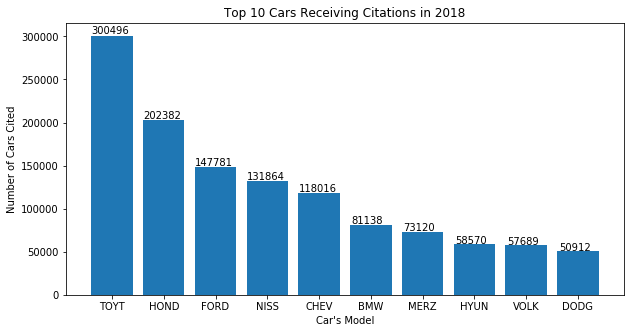

In [173]:
#Bargraph
fig, ax = plt.subplots(figsize=(10,5))

#Set x and y values
ax.bar(x=make.index, height=make);

#Set labels and title
ax.set_xlabel('Car\'s Model')
ax.set_ylabel('Number of Cars Cited')
ax.set_title('Top 10 Cars Receiving Citations in 2018')

#The count is on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

BAR GRAPH - Top 10 Citations Issued in 2018

In [21]:
#Get the top 10 violations
violation = df2['Violation Description'].value_counts()[:10]

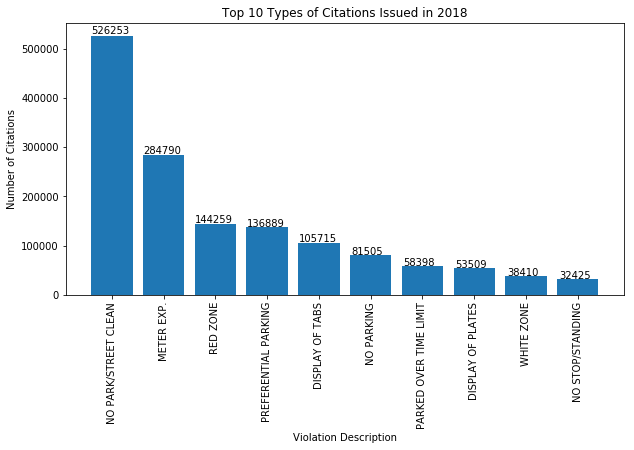

In [40]:
#Bar Graph
fig, ax = plt.subplots(figsize=(10,5))

#Set the x and y values
ax.bar(x=violation.index, height=violation);

#Set the labels and title
ax.set_xlabel('Violation Description')
ax.set_ylabel('Number of Citations')
ax.set_title('Top 10 Types of Citations Issued in 2018')

#Rotate the names of x-values
plt.xticks(rotation=90)

#The count is on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

# Heatmap Visualization

In [23]:
#Create a dictionary where its keys are month dataes and values are monthly data
month_dict = {1:pd.DataFrame(),2:pd.DataFrame(),3:pd.DataFrame(),4:pd.DataFrame(),5:pd.DataFrame()
            ,6:pd.DataFrame(),7:pd.DataFrame(),8:pd.DataFrame(),9:pd.DataFrame(),10:pd.DataFrame()
            ,11:pd.DataFrame(),12:pd.DataFrame()}

In [24]:
#Save each dataframe in their respective month
for key, value in month_dict.items():
    value = df2[df2['Date Stamp'].dt.month==key]
    month_dict[key] = value
    month_dict[key].drop(columns=month_dict[key].columns[:6])

In [25]:
#Group Data to get the count of each
def group(mth):
    return (month_dict[mth]
            .groupby(['Date Stamp','lat','lon', 'Week','Day','Hour'])['Issue Date']
            .count()
            .reset_index()
            .rename(columns={'Issue Date':'count'}))

In [26]:
#Change each month's value by executing the group function
for key in month_dict.keys():
    month_dict[key] = group(key)

In [121]:
#Folium base map canvas
def base_map(default_location=[34.0522, -118.2437], default_zoom_start=12):
    m = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return m

Heatmap for the 12 months

In [160]:
def static_heatmap(month_key):
    m = base_map()
    HeatMap(data=month_dict[month_key].sample(33340)[['lat', 'lon', 'count']].groupby(['lat', 'lon']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(m)
    print('LA Parking Citations- Time frame Month:', month_key)
    return m

In [177]:
#Input month_dict key's, 1-12
static_heatmap(6)

LA Parking Citations- Time frame Month: 6


Heatmap of Hours, Days, and Weeks within the month

Running Hours in this function uses the hours of the whole month not per day

In [184]:
#Make an Empty list - Need a list of values in order to pass in to the HeatMapWithTime function
time_of_day_list = []

def month_heatmap(time_of_day, month_key):
#Clear values inside the list
    time_of_day_list.clear()

#Get Samples - Choose a key in month_dict and hour, day, or weeks
    sample = month_dict[month_key].sample(33340)

#Sort values in order of Week and loop over its unique value
    for type_ in sample[time_of_day].sort_values().unique():
    
#Locate the row of column 'week' and the columns we want to groupby('lat', 'lon', 'count')
        (time_of_day_list.append(sample.loc[sample[time_of_day] == type_, ['lat', 'lon', 'count']]
                         
#Group by 'lat' and 'lon' and get the sum of each count for the coordinates
                             .groupby(['lat', 'lon']).sum()
                         
#Reset index of 'lat' and 'lon'. Get its values and append it to the time_of_day_list.
                             .reset_index().values.tolist()))
    m = base_map(default_zoom_start=11)
    HeatMapWithTime(time_of_day_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(m)
    print('LA Parking Citations- Time frame', time_of_day + ': Month', month_key)
    return m

In [188]:
#Pass in ('Hour','Day', or 'Week'), 1-12
month_heatmap('Day', 6)

LA Parking Citations- Time frame Day: Month 6


Hourly Heatmap per day

In [167]:
hour_list=[]
def hourly_heatmap(time_of_day, month_key, day):
    hour_list.clear()
    if (time_of_day == 'Hour'):
        sample = month_dict[month_key][month_dict[month_key]['Date Stamp'].dt.day==day]
        
    for type_ in sample['Hour'].sort_values().unique():
        (hour_list.append(sample.loc[sample['Hour'] == type_, ['lat', 'lon', 'count']]
                                 .groupby(['lat', 'lon']).sum()
                                 .reset_index().values.tolist()))
    m = base_map(default_zoom_start=11)
    HeatMapWithTime(hour_list, radius=5, gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(m)
    print('LA Parking Citations- Time Frame', time_of_day + ': Month', month_key, 'and Day', day)
    return m

In [182]:
#Pass in 'Hour', 1-12, 1-31(some days may be missing due to random sampling)
hourly_heatmap('Hour', 6, 11)

LA Parking Citations- Time Frame Hour: Month 6 and Day 11
